- Trees basics: node, leaf
- Entropy and gini
- Classification with trees
- Limits of trees

## Trees & Forests 🌳🌳🌳

---

![](https://alliance2030.ca/wp-content/uploads/2019/01/michael-benz-258430-unsplash-1200x675-c-default.jpg)

---

Today we will explore a new **classification** machine learning algorithm (supervised for categorical data) called **Decision Trees**. 🌳

It is:
- one of the oldest ML algorithm
- extremely robust
- quite intuitive

We will also discover an extension of the Decision Trees: the **Random Forests** 🌳🌳🌳

Let's dig in!

---

# I. Trees Intuition

## I.1. Linearly separable data?

Let's take this example of a kitesurfer who is interested in two things before pumping his kite:
- it should be sunny ⛱
- it should be windy! 💨 

Let's plot that data on a 2D chart, and for each tuple (Wind strength, Temperature) let's draw a point representing if YES or NO the kiter should pump his kite. 

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1CzUK8T2fMxGSQDeOogeUws2-Yl7tVo6M">
</p>

Is this data linearly separable? Explain.

Nope! It's not linearly separable - as you cannot draw a line splitting effectively the data points.

Decision trees allow us to ask **multiple linear questions**, one after the other.

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1Xu7naCNA4McFww11uUqAVvtqFNNArnlS">
</p>

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1DxwQGeMRqTuJmhV4HYAeoD85bFx_vp0Y" width="350">
</p>

## I.2. Let's construct a more complex decision tree

Let's take a problem a bit more complex and see how would look our decision tree.

<img src="https://drive.google.com/uc?export=view&id=1am_borVWERNA0BvOgsIy2HPqwJexAdD7">

We begin with every point in the training set at the top of the tree. These training points have labels — the red points represent students that didn't get an A on a test and the green points represent students that did get an A on a test .

We then decide to split the data into smaller groups based on a feature. For example, that feature could be something like their average grade in the class. Students with an A average would go into one set, students with a B average would go into another subset, and so on.

Once we have these subsets, we repeat the process — we split the data in each subset again on a different feature.

Eventually, we reach a point where we decide to stop splitting the data into smaller groups. We've reached a leaf of the tree. We can now count the labels of the data in that leaf. If an unlabeled point reaches that leaf, it will be classified as the majority label.

## I.3. Nodes

- First node (with first split) is called the **root node**
- **Decision node** is a node with two or more branches (above a split)
- **Leaf node** carries the final classification prediction 🍂

---

# II. Implementation with scikit-learn

## II.1. Coding a decision tree

In [1]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
X_small = X[:,:2] # We keep only 2 features for visualisation purposes

In [2]:
print("X_small.shape={}".format(X_small.shape))
print("y.shape={}".format(y.shape))

X_small.shape=(150, 2)
y.shape=(150,)


In [3]:
import matplotlib
from matplotlib import pyplot as plt

# Create figure to draw chart
plt.figure(2, figsize=(10, 8))

# Plot the training points
plt.scatter(X_small[:, 0], X_small[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')

# Format chart
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xticks(())
plt.yticks(())

plt.show()

<Figure size 1000x800 with 1 Axes>

We start by importing the proper method `DecisionTreeClassifier` from `sklearn` and to instanciate our Decision Tree classifier.

In [4]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier() # Per default, criterion="gini"; you could specify criterion="entropy"

Then we fit our model as usual

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_small, y, random_state=0)

In [6]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Finally we can retrieve predictions based on our model

In [7]:
y_pred = dt.predict(X_test)

And retrieve a score (accuracy) of our model 

In [8]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print("Model has an accuracy of {}%".format(acc*100))

Model has an accuracy of 63.1578947368421%


We can get a better understanding of our model by plotting the decision boundaries

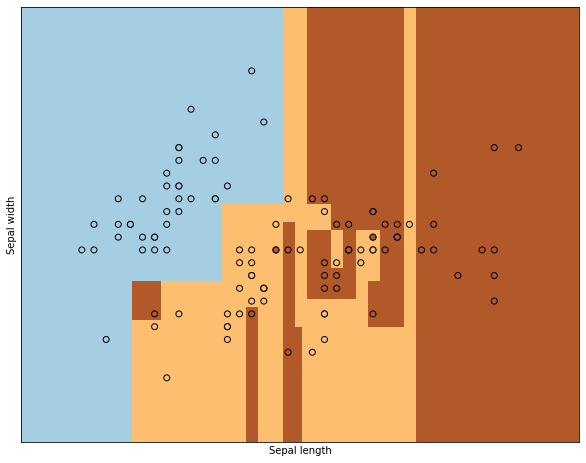

In [9]:
import numpy as np
from matplotlib import pyplot as plt

# Create figure to draw chart
plt.figure(2, figsize=(10, 8))

# We create a grid of points contained within [x_min, x_max]x[y_min, y_max] with step h=0.02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size of the grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Retrieve predictions for each point of the grid
Z_dt = dt.predict(np.c_[xx.ravel(), yy.ravel()])
Z_dt = Z_dt.reshape(xx.shape)

# Plot the decision boundary (label predicted assigned to a color)
plt.pcolormesh(xx, yy, Z_dt, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)

# Format chart
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xticks(())
plt.yticks(())
plt.show()

## II.2. Visualizing our tree

`sklearn` even allows us to visualize the tree. By exporting it to graphviz format and opening it with another library called `graphviz` (you will need to install it by running `pip install graphviz`).

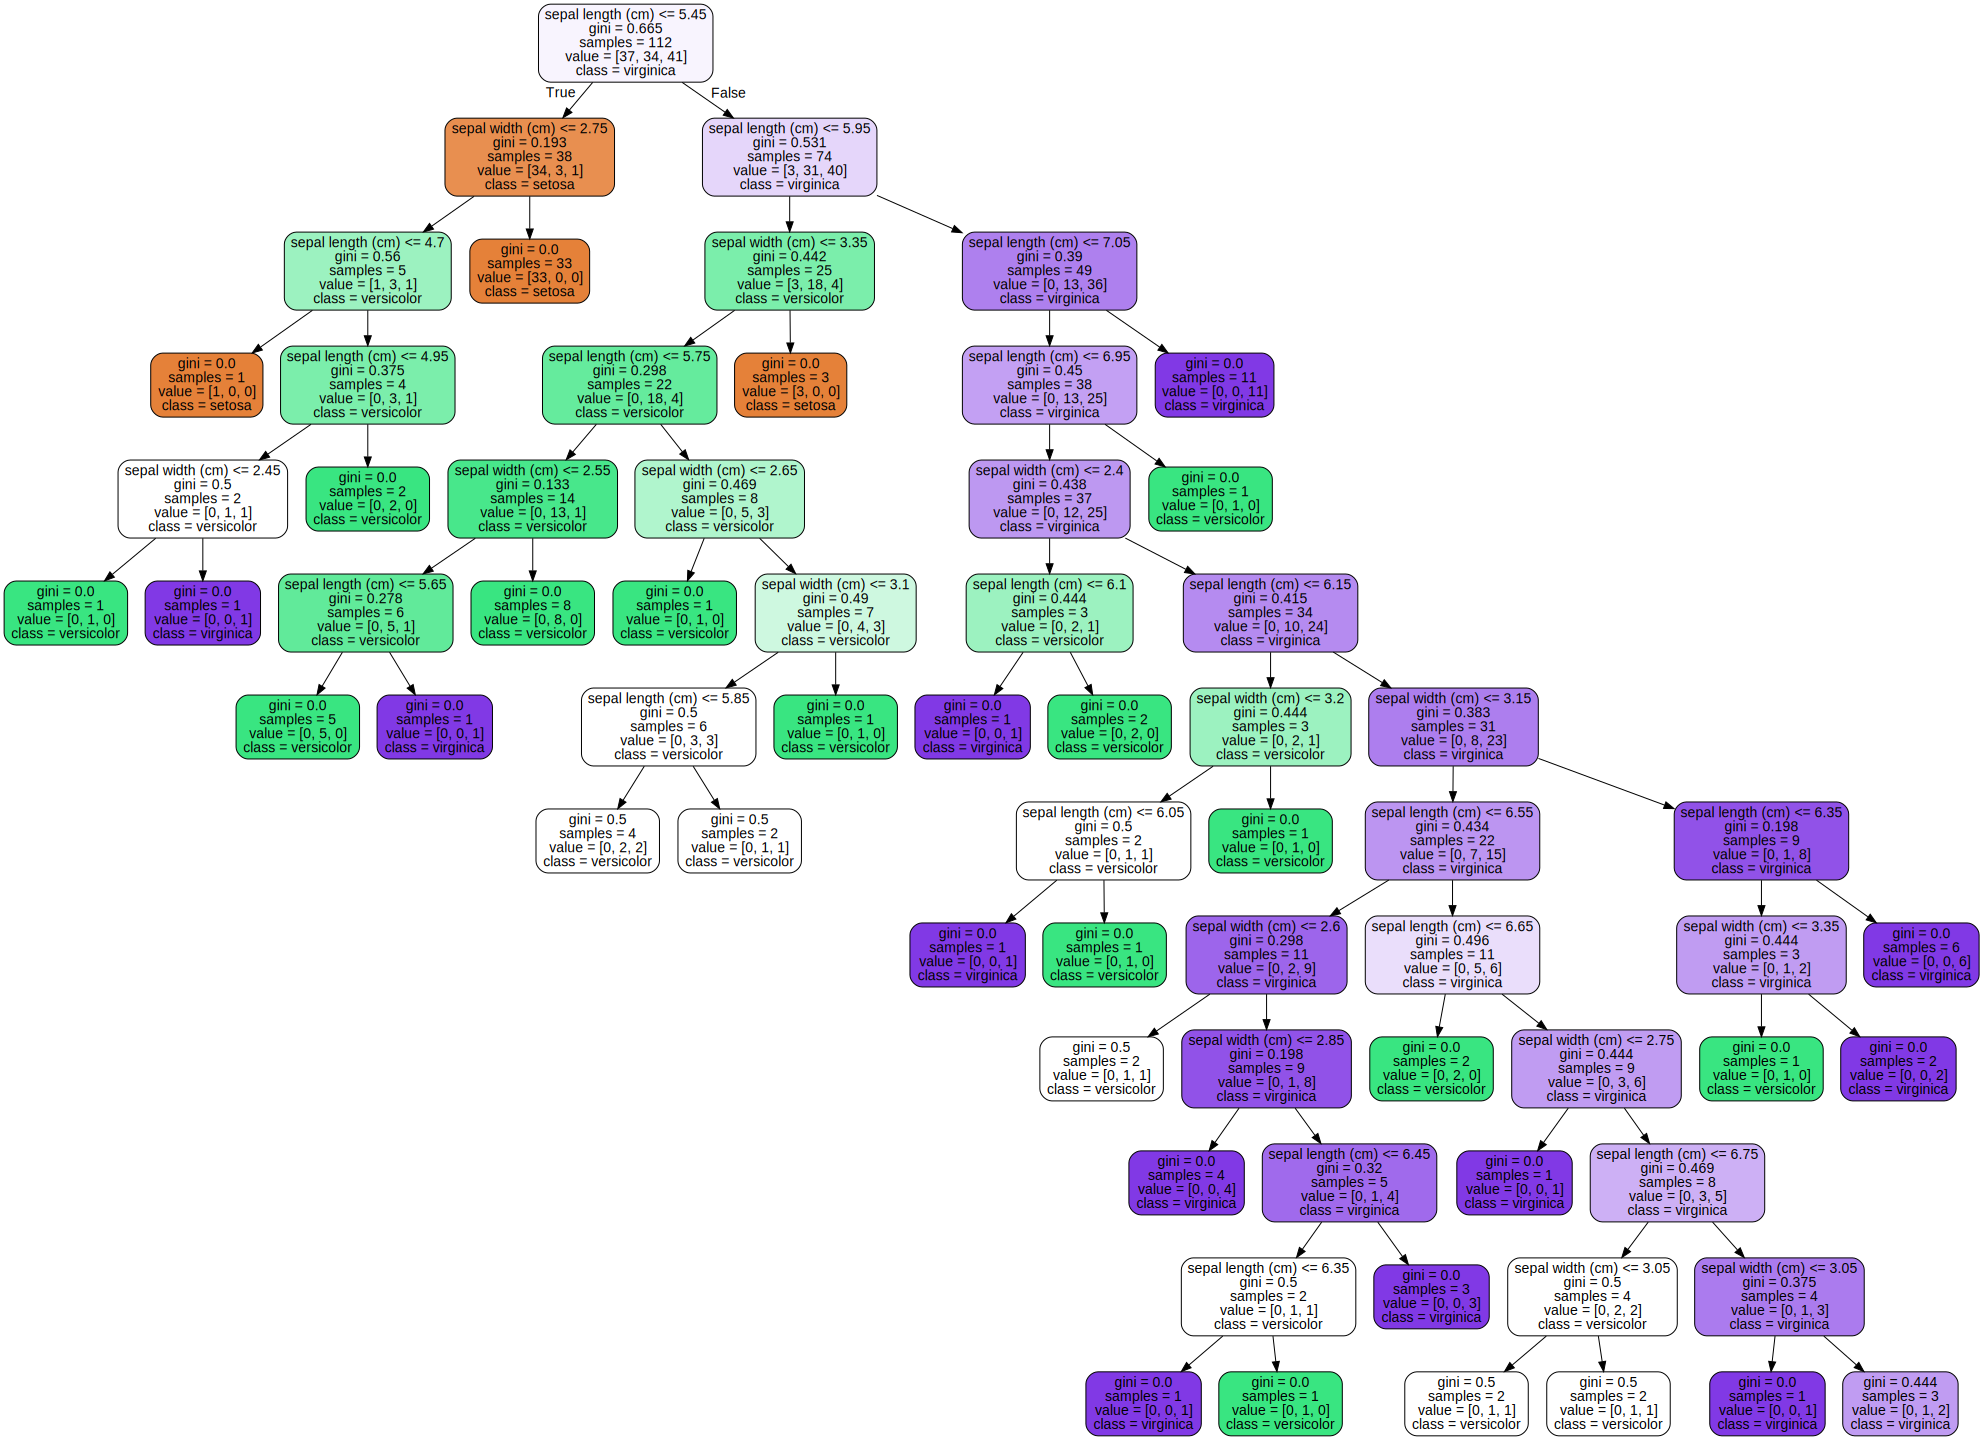

In [11]:
from sklearn.tree import export_graphviz
import graphviz

# We load iris data again to retrieve features and classes names
iris = load_iris()

# We export the tree in graphviz format 
dot_data = export_graphviz(dt,
                           out_file=None,
                           feature_names=iris.feature_names[:2],  
                           class_names=iris.target_names,  
                           filled=True, rounded=True)

# We load the tree again with graphviz library in order to display it
graph = graphviz.Source(dot_data)
graph

## II.3. Interpretability

With trees, it becomes very easy to inspect and understand important features in our model decision. 

You just have to inspect `feature_importances_` attribute! 

In [10]:
print(dt.feature_importances_)

[0.74427196 0.25572804]


Or if you want to make it more visual 🙂

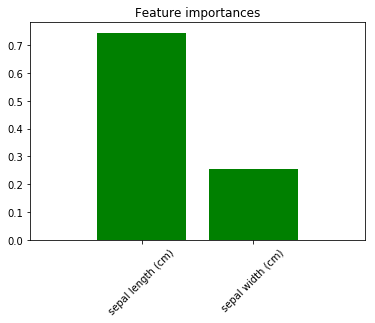

sepal length (cm) - 0.745
sepal width (cm) - 0.255


In [13]:
# Feature importances
features = iris.feature_names[:2]
importances = dt.feature_importances_
indices = np.argsort(importances)[::-1]
num_features = len(importances)

# Plot the feature importances of the tree
plt.figure()
plt.title("Feature importances")
plt.bar(range(num_features), importances[indices], color="g", align="center")
plt.xticks(range(num_features), [features[i] for i in indices], rotation='45')
plt.xlim([-1, num_features])
plt.show()

# Print values
for i in indices:
    print ("{0} - {1:.3f}".format(features[i], importances[i]))

## II.4. Impact and meaning of parameters

- **criterion**: The function to measure the quality of a split. For example `Gini Impurity` or `Entropy` 


- **max_depth**: The maximum depth of the tree


- **min_samples_split**: The minimum number of samples required to split an internal node


- **min_samples_leaf**: The minimum number of samples required to be at a leaf node.

 
- **min_weight_fraction_leaf** : The minimum weighted fraction of the sum total of weights (of all
    the input samples) required to be at a leaf node. Samples have
    equal weight when sample_weight is not provided.
    

- **max_features**: The number of features to consider when looking for the best split.


    Note: the search for a split does not stop until at least one
    valid partition of the node samples is found, even if it requires to
    effectively inspect more than ``max_features`` features.
    

- **max_leaf_nodes** : Grow a tree with ``max_leaf_nodes`` in best-first fashion.
    Best nodes are defined as relative reduction in impurity.
    If None then unlimited number of leaf nodes.
    

- **min_impurity_decrease**: A node will be split if this split induces a decrease of the impurity
    greater than or equal to this value.

---

# III. How is the tree constructed?

## III.1. Greedy algorithm

We construct our tree using a **greedy algorithm**. It means that it does not look ahead and chooses to split the data based on the best possible feature given the current dataset.

At a given step, the model computes a "measure of disorder" of our dataset, and attemps to "reduce this disorder". It tries to reduce this disorder by splitting our dataset based on 1 feature.

In order to know which feature to split on, the algorithm needs tro try them all.

We can choose different "measures of disorder" when building our tree: the most common are **Entropy** or **Gini Impurity**. We define them below.

> 📚 **Resources**: Splitting on a discrete variable is straightforward. If you are wondering how the algorithm splits on a continuous variable, [check this link](https://datascience.stackexchange.com/questions/24339/how-is-a-splitting-point-chosen-for-continuous-variables-in-decision-trees)

## III.2. Entropy

### III.2.A. Definition

The **Entropy** is a **measure of randomness (or unpredictability)** in the dataset.

We define the **Entropy of a dataset** like this: 
![](https://chart.apis.google.com/chart?cht=tx&chl=E%3D-%5Csum_ip_i%5Clog_2p_i%20%2C)

where $p_i$ corresponds to the ratios of elements of each label `i` in the set

If you chart the **Binary Entropy function** (the Entropy for a random variable `X` that can take one out of 2 values (`a` and `b` for example) using the formula above for every possible value of `p(X=a)`, it looks like this: 

<p align="center">
<img src="https://i.stack.imgur.com/OUgcx.png">
</p>

> 🔦 **Hint**: It reaches its maximum when the probability is p=1/2, meaning that $p(X=a)=0.5$ or similarly $p(X=b)=0.5$ having a 50%/50% chance of being either a or b (uncertainty is at a maximum). The entropy function is at zero minimum when probability is p=1 or p=0 with complete certainty ( $p(X=a)=1$ or $p(X=a)=0$ respectively, latter implies $p(X=b)=1$ ).

### III.2.B. Illustration

<img src="https://drive.google.com/uc?export=view&id=1mGOOvmwCiBTxZCMeJ2h6ja14Frh1fM0c">

At each step, we can compute the Entropy of our splitted dataset by computing the **weighted mean of Entropy** of all subsets:

![](https://chart.apis.google.com/chart?cht=tx&chl=E_%7B%5Crm%20split%7D%3D%5Cfrac%7BN_1%7D%7BN%7DE_1%2B%5Cfrac%7BN_2%7D%7BN%7DE_2)

Splitting our dataset into two subsets "with less randomness" reduces our entropy.

## III.2. Gini Impurity

Instead of computing **Entropy** at each split, we could also compute another "measure of disorder" called the **Gini Impurity**:

It is defined as such:

$$
I_{{G}}(f)=\sum _{{i=1}}^{{m}}f_{i}(1-f_{i})=\sum _{{i=1}}^{{m}}(f_{i}-{f_{i}}^{2})=\sum _{{i=1}}^{m}f_{i}-\sum _{{i=1}}^{{m}}{f_{i}}^{2}=1-\sum _{{i=1}}^{{m}}{f_{i}}^{{2}}
$$

In other words, to find the Gini impurity, **start at 1 and subtract the squared proportion of each label in the set**. Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset.

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1vGvHB-oPksgqCEI78jSUPwNU9d2AGV4v" width="500">
</p>

*Should you use Gini or Entropy?*
- Your performance will almost never change whether you use Gini impurity or Entropy.
- Entropy might be a little slower to compute

## III.3. (Weighted) Information Gain

Finally, given the "measure of disorder" (Entropy or Gini Impurity) of a parent dataset and of children datasets, we can compute the **Information Gain** which corresponds of the  **measure of the decrease** of our "measure of disorder"  after the data split.

As its name indicates, it represents the increase of knowledge when performing the split.

But we actually prefer to use the **Weighted Information Gain**, which takes into account the size of the subsets created.

If the data before the split contained 20 items and one of the resulting splits contained 2 items, then the weighted impurity of that subset would be 2/20 * impurity.

By doing so we are lowering the importance of the impurity of sets with few elements.

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1OTY2LCK_ZF9gogmxH9Bqmn4ner_3VlZE" width="500">
</p>

We have reached the **base case** (or **leaf node** 🍂) when **splitting on every feature results in the largest information gain**.

> 📚 **Resources**: 
- [What is Entropy and Information Gain](https://stackoverflow.com/questions/1859554/what-is-entropy-and-information-gain)
- [A Simple Explanation of Entropy in Decision Trees](https://bricaud.github.io/personal-blog/entropy-in-decision-trees/)